<a href="https://colab.research.google.com/github/emillycfn/ANALISE-PREDITIVA/blob/main/C%C3%B3digos_Analise_preditiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Faça o upload do arquivo chamado '25.04.22.Dados'


Saving 25.04.22.Dados.xlsx to 25.04.22.Dados.xlsx
Exibindo as 5 primeiras linhas do conjunto de dados:


,Sales,Year,Month,Weekday
Date,,,,
2022-01-01,96,2022,1,Saturday
2022-01-02,94,2022,1,Sunday
2022-01-03,75,2022,1,Monday
2022-01-04,92,2022,1,Tuesday
2022-01-05,126,2022,1,Wednesday


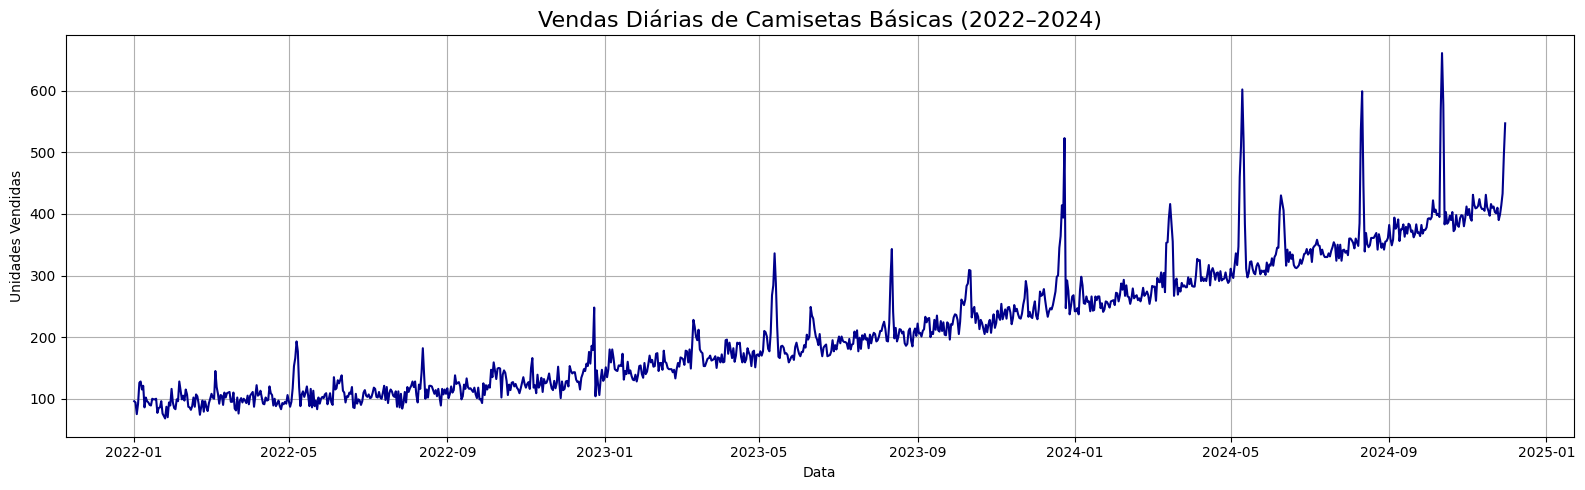

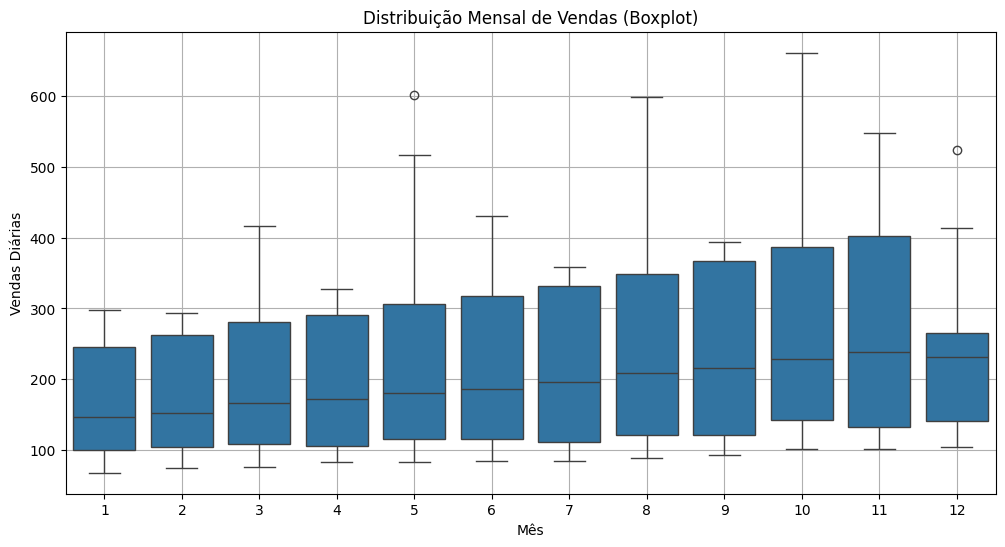

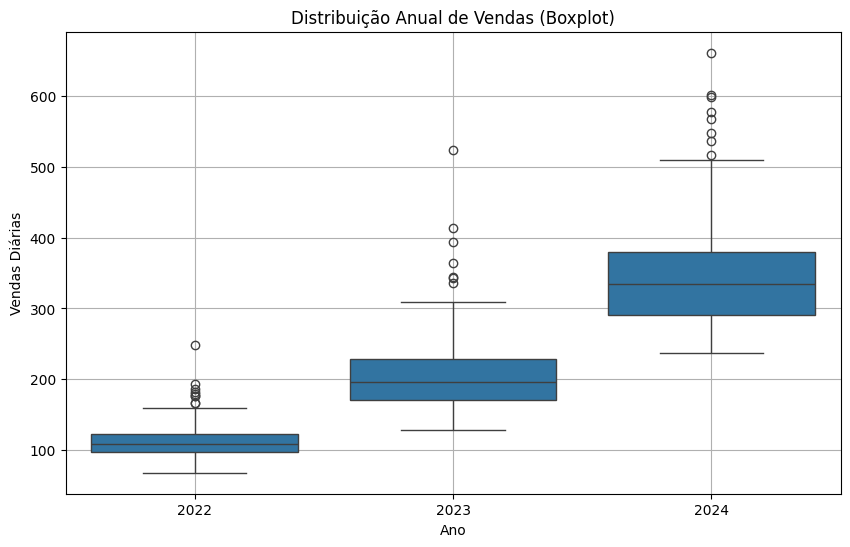

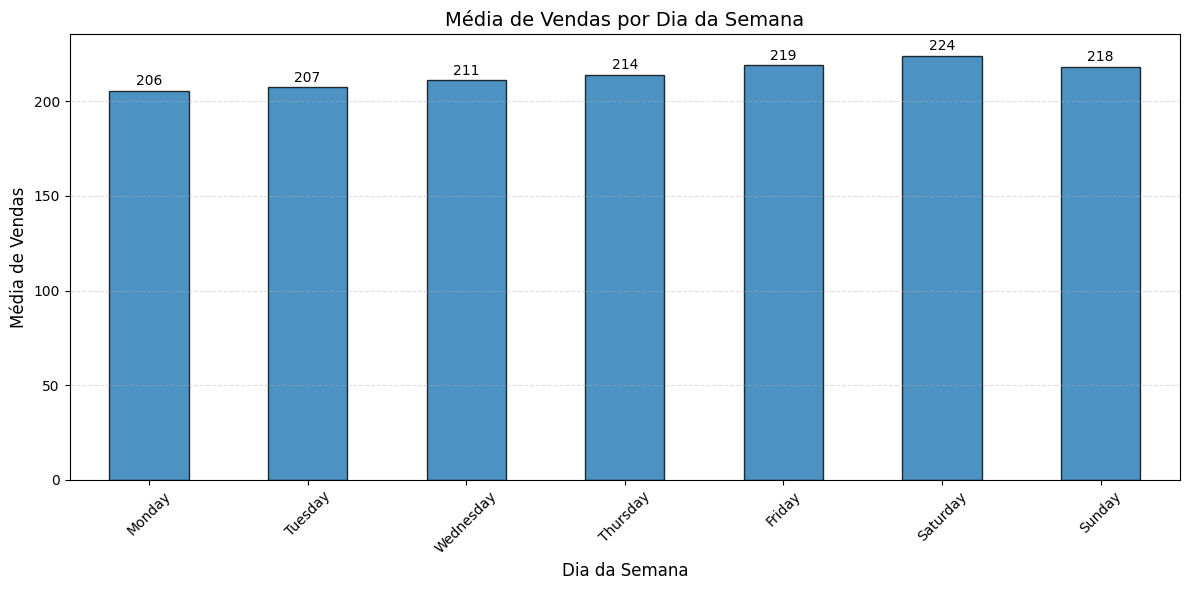

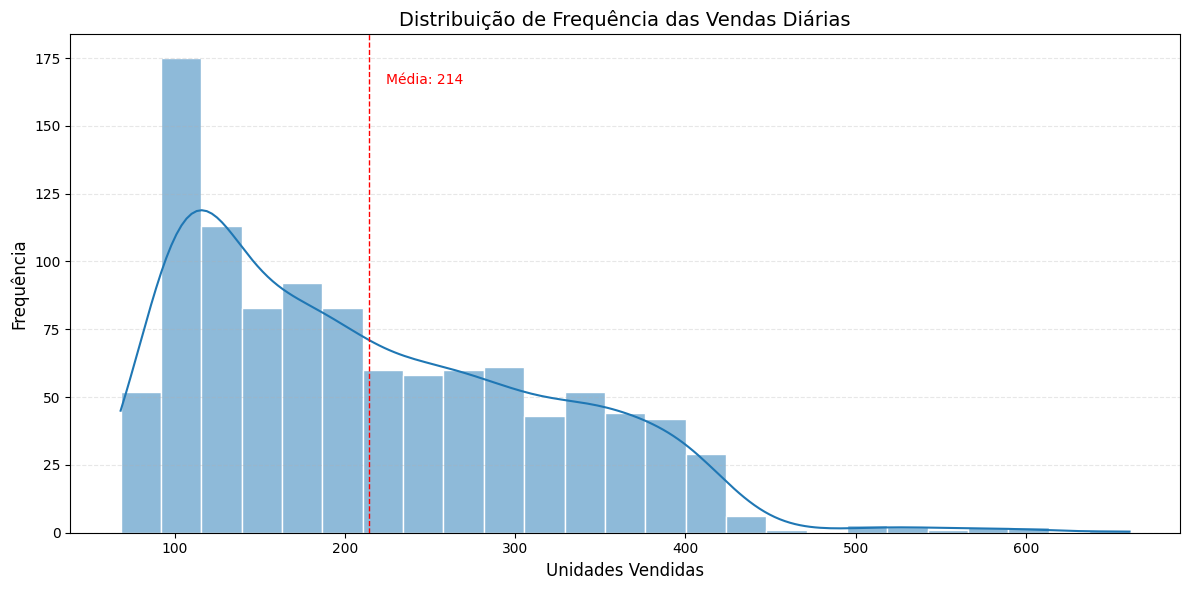

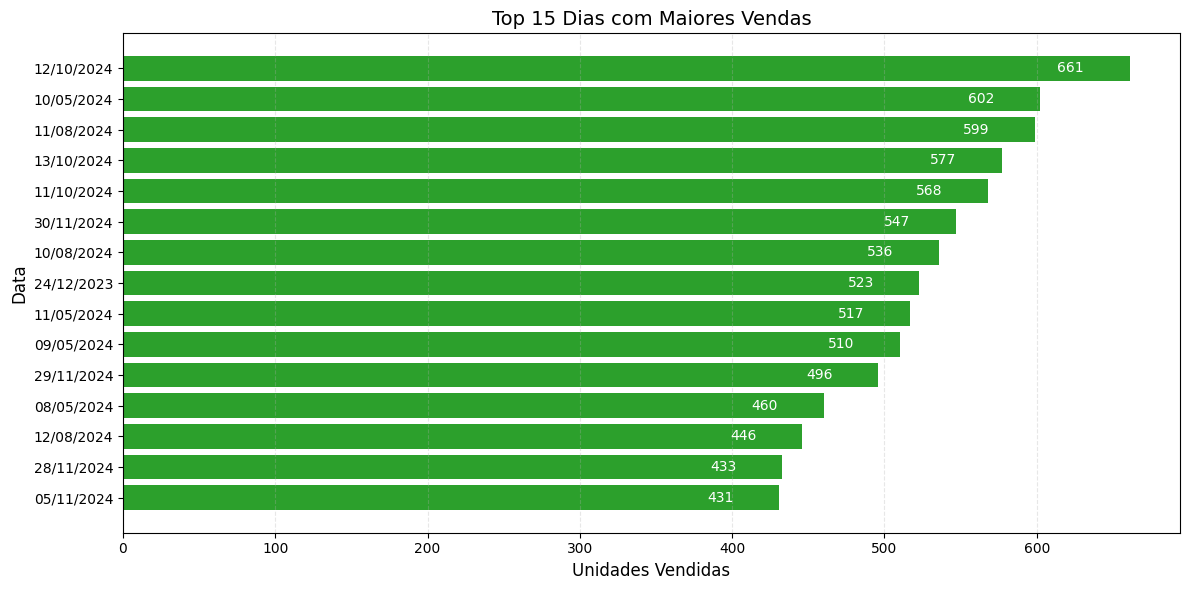

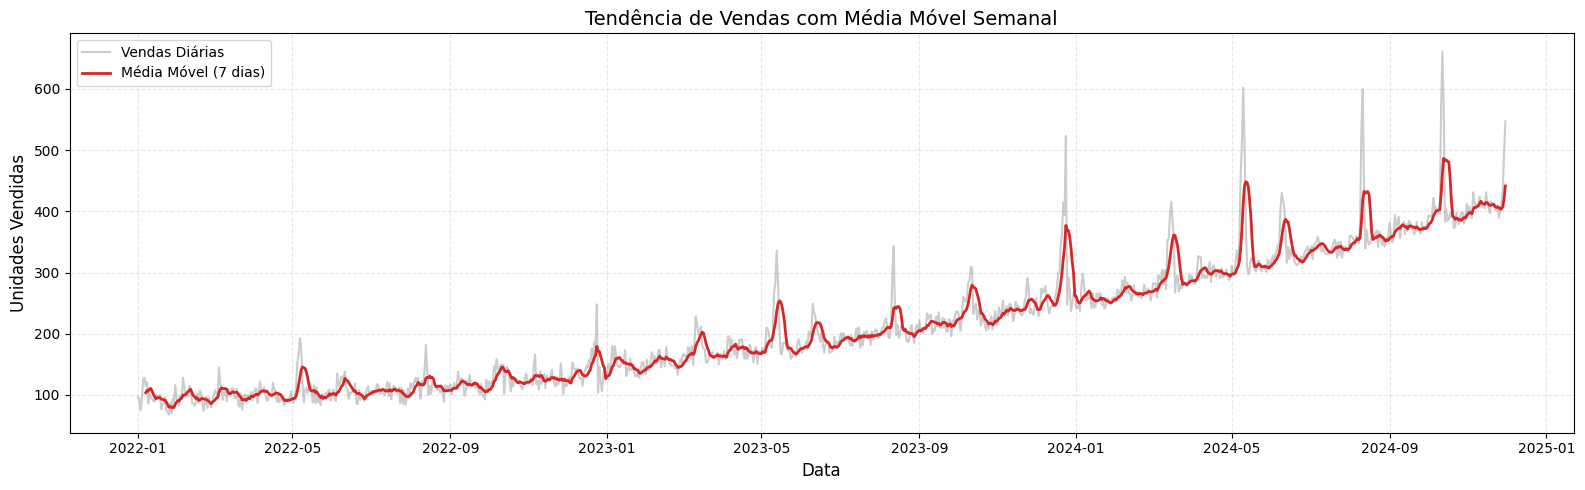

In [ ]:
# Código 1 – Análise Exploratória e Visualização Gráfica dos Dados Históricos (2022–2024)
# Instalar bibliotecas se necessário
!pip install matplotlib seaborn --quiet

# Importar bibliotecas principais
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Etapa 1: Upload do arquivo
print("Faça o upload do arquivo chamado '25.04.22.Dados'")
uploaded = files.upload()

# Etapa 2: Carregar os dados
# Use the correct filename and pd.read_excel to read the Excel file
df = pd.read_excel(list(uploaded.keys())[0]) # Assuming only one file is uploaded

# Renomear colunas, se necessário
df.columns = ['Date', 'Sales']

# Converter a coluna de datas
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)

# Etapa 3: Criar colunas auxiliares para análise
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday'] = df.index.day_name()

# Ver os dados iniciais
print("Exibindo as 5 primeiras linhas do conjunto de dados:")
display(df.head())

# =============================================
# GRÁFICO 1 – Série Temporal Completa
# =============================================
plt.figure(figsize=(16,5))
plt.plot(df.index, df['Sales'], color='darkblue')
plt.title('Vendas Diárias de Camisetas Básicas (2022–2024)', fontsize=16)
plt.xlabel('Data')
plt.ylabel('Unidades Vendidas')
plt.grid(True)
plt.tight_layout()
plt.show()

# =============================================
# GRÁFICO 2 – Boxplot por Mês
# =============================================
plt.figure(figsize=(12,6))
sns.boxplot(x='Month', y='Sales', data=df)
plt.title('Distribuição Mensal de Vendas (Boxplot)')
plt.xlabel('Mês')
plt.ylabel('Vendas Diárias')
plt.grid(True)
plt.show()

# =============================================
# GRÁFICO 3 – Boxplot por Ano
# =============================================
plt.figure(figsize=(10,6))
sns.boxplot(x='Year', y='Sales', data=df)
plt.title('Distribuição Anual de Vendas (Boxplot)')
plt.xlabel('Ano')
plt.ylabel('Vendas Diárias')
plt.grid(True)
plt.show()

# =============================================
# GRÁFICO 4: MÉDIA DE VENDAS POR DIA DA SEMANA
# =============================================
plt.figure(figsize=(12,6))
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_avg = df.groupby('Weekday')['Sales'].mean().reindex(weekday_order)

# Configuração visual alinhada com seus gráficos anteriores
weekday_avg.plot(kind='bar', color='#1f77b4', edgecolor='black', alpha=0.8)
plt.title('Média de Vendas por Dia da Semana', fontsize=14)
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Média de Vendas', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Adicionando valores nas barras
for i, v in enumerate(weekday_avg):
    plt.text(i, v+3, f"{v:.0f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# =============================================
# GRÁFICO 5: HISTOGRAMA DAS VENDAS DIÁRIAS
# =============================================
plt.figure(figsize=(12,6))
sns.histplot(df['Sales'], bins=25, color='#1f77b4', edgecolor='white', kde=True)

plt.title('Distribuição de Frequência das Vendas Diárias', fontsize=14)
plt.xlabel('Unidades Vendidas', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Linha para média
mean_sales = df['Sales'].mean()
plt.axvline(mean_sales, color='red', linestyle='--', linewidth=1)
plt.text(mean_sales+10, plt.ylim()[1]*0.9, f'Média: {mean_sales:.0f}', color='red')

plt.tight_layout()
plt.show()

# =============================================
# GRÁFICO 6: TOP 15 MAIORES PICOS DE VENDA
# =============================================
top_days = df.nlargest(15, 'Sales').sort_values('Sales')

plt.figure(figsize=(12,6))
bars = plt.barh(top_days.index.strftime('%d/%m/%Y'), top_days['Sales'], color='#2ca02c')

plt.title('Top 15 Dias com Maiores Vendas', fontsize=14)
plt.xlabel('Unidades Vendidas', fontsize=12)
plt.ylabel('Data', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Adicionando valores nas barras
for bar in bars:
    width = bar.get_width()
    plt.text(width-30, bar.get_y()+bar.get_height()/2,
             f'{width:.0f}',
             ha='right', va='center', color='white')

plt.tight_layout()
plt.show()

# =============================================
# GRÁFICO 7: MÉDIA MÓVEL DE 7 DIAS
# =============================================
df['MA_7_dias'] = df['Sales'].rolling(window=7).mean()

plt.figure(figsize=(16,5))
plt.plot(df.index, df['Sales'], color='gray', alpha=0.4, label='Vendas Diárias')
plt.plot(df.index, df['MA_7_dias'], color='#d62728', linewidth=2, label='Média Móvel (7 dias)')

plt.title('Tendência de Vendas com Média Móvel Semanal', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Unidades Vendidas', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Código 2 – Preparação dos Dados
# Importar as bibliotecas necessárias
import pandas as pd
from google.colab import files
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday

# Upload do arquivo Excel
uploaded = files.upload()

# Carregar os dados no DataFrame
df = pd.read_excel(list(uploaded.keys())[0])

# Renomear colunas para facilidade de uso
df.columns = ['Date', 'Sales']

# Converter coluna de datas em índice datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)

# Tratamento de dados faltantes
df = df.reindex(pd.date_range(df.index.min(), df.index.max(), freq='D'))
df['Sales'] = df['Sales'].interpolate(method='linear')
df['Sales'].fillna(df['Sales'].rolling(window=7, min_periods=1).mean(), inplace=True)

# Criação de variáveis adicionais (enriquecimento dos dados)
df['Weekday'] = df.index.day_name()
df['Month'] = df.index.month
df['Quarter'] = df.index.quarter
df['DayOfMonth'] = df.index.day
df['WeekOfYear'] = df.index.isocalendar().week

# Criação de variáveis binárias para feriados nacionais e Black Friday
class BrazilHolidays(AbstractHolidayCalendar):
    rules = [
        Holiday('Ano Novo', month=1, day=1),
        Holiday('Tiradentes', month=4, day=21),
        Holiday('Dia do Trabalho', month=5, day=1),
        Holiday('Dia das Crianças', month=10, day=12),
        Holiday('Natal', month=12, day=25),
    ]

# Aplicando calendário de feriados
holidays = BrazilHolidays().holidays(df.index.min(), df.index.max())
df['Holiday'] = df.index.isin(holidays).astype(int)

# Flag específica para Black Friday
df['BlackFriday'] = ((df.index.month == 11) &
                     (df.index.weekday == 4) &
                     (df.index.day >= 23) &
                     (df.index.day <= 29)).astype(int)

# Confirmação visual do resultado final
print("Preparação de dados concluída com sucesso!")
display(df.head(10))


Saving 25.04.22.Dados.xlsx to 25.04.22.Dados (1).xlsx
Preparação de dados concluída com sucesso!


<ipython-input-2-98897ba3304f>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sales'].fillna(df['Sales'].rolling(window=7, min_periods=1).mean(), inplace=True)


,Sales,Weekday,Month,Quarter,DayOfMonth,WeekOfYear,Holiday,BlackFriday
2022-01-01,96,Saturday,1,1,1,52,1,0
2022-01-02,94,Sunday,1,1,2,52,0,0
2022-01-03,75,Monday,1,1,3,1,0,0
2022-01-04,92,Tuesday,1,1,4,1,0,0
2022-01-05,126,Wednesday,1,1,5,1,0,0
2022-01-06,128,Thursday,1,1,6,1,0,0
2022-01-07,115,Friday,1,1,7,1,0,0
2022-01-08,121,Saturday,1,1,8,1,0,0
2022-01-09,86,Sunday,1,1,9,1,0,0
2022-01-10,102,Monday,1,1,10,2,0,0


Saving 25.04.22.Dados.xlsx to 25.04.22.Dados.xlsx
Tabela de Previsões:


,Naive,Acumulativo,Média Móvel (7 dias)
Data,,,
2024-12-01,547,214.157746,441.285714
2024-12-02,547,214.157746,441.285714
2024-12-03,547,214.157746,441.285714
2024-12-04,547,214.157746,441.285714
2024-12-05,547,214.157746,441.285714
2024-12-06,547,214.157746,441.285714
2024-12-07,547,214.157746,441.285714
2024-12-08,547,214.157746,441.285714
2024-12-09,547,214.157746,441.285714


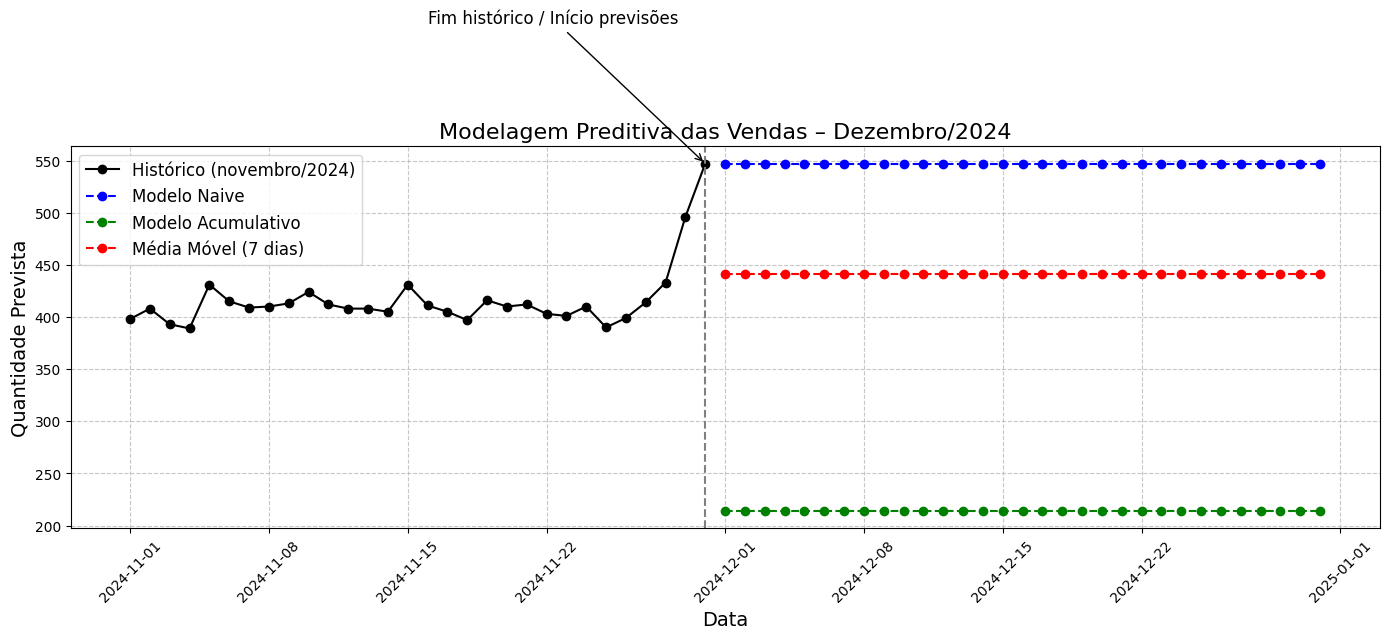

In [ ]:
# Código 3 – Modelagem Preditiva
# ===============================================
# Etapa 1 – Importação das bibliotecas necessárias
# ===============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# ===============================================
# Etapa 2 – Upload e leitura dos dados históricos
# ===============================================
uploaded = files.upload()
df = pd.read_excel(list(uploaded.keys())[0])

# Ajuste inicial dos dados
df.columns = ['Date', 'Sales']
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)

# ===============================================
# Etapa 3 – Definir conjuntos de treino e teste
# ===============================================
train = df.loc[:'2024-11-30', 'Sales']
test_period = pd.date_range(start='2024-12-01', end='2024-12-31')

# ===============================================
# Etapa 4 – Aplicação detalhada dos modelos preditivos
# ===============================================

# 1. Modelo Naive (último valor observado)
naive_forecast = [train.iloc[-1]] * len(test_period)

# 2. Modelo Acumulativo (média geral histórica)
cumulative_forecast = [train.mean()] * len(test_period)

# 3. Modelo Média Móvel Simples (últimos 7 dias)
moving_avg_forecast = [train.iloc[-7:].mean()] * len(test_period)

# ===============================================
# Etapa 5 – Consolidar previsões em um DataFrame
# ===============================================
forecasts_df = pd.DataFrame({
    'Data': test_period,
    'Naive': naive_forecast,
    'Acumulativo': cumulative_forecast,
    'Média Móvel (7 dias)': moving_avg_forecast
})
forecasts_df.set_index('Data', inplace=True)

# Exibir tabela resultante
print("Tabela de Previsões:")
display(forecasts_df)

# ===============================================
# Etapa 6 – Gráfico Completo para análise visual
# ===============================================
plt.figure(figsize=(14, 7))

# Dados históricos recentes (novembro/2024)
plt.plot(train.loc['2024-11-01':'2024-11-30'], marker='o', color='black', label='Histórico (novembro/2024)')

# Previsões futuras (dezembro/2024)
plt.plot(forecasts_df.index, forecasts_df['Naive'], marker='o', linestyle='--', color='blue', label='Modelo Naive')
plt.plot(forecasts_df.index, forecasts_df['Acumulativo'], marker='o', linestyle='--', color='green', label='Modelo Acumulativo')
plt.plot(forecasts_df.index, forecasts_df['Média Móvel (7 dias)'], marker='o', linestyle='--', color='red', label='Média Móvel (7 dias)')

# Linha divisória entre histórico e previsão
plt.axvline(x=train.index[-1], color='gray', linestyle='--')

# Títulos e anotações detalhadas
plt.title('Modelagem Preditiva das Vendas – Dezembro/2024', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Quantidade Prevista', fontsize=14)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Anotação explicativa
plt.annotate('Fim histórico / Início previsões',
             xy=(train.index[-1], train.iloc[-1]),
             xytext=(train.index[-15], train.max()+20),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
# Código 4 – Preparação Completa dos Dados com Variáveis Históricas (7 Lags) para Regressão Linear

# Importação das bibliotecas necessárias
import pandas as pd
from google.colab import files

# Upload do arquivo Excel fornecido pelo usuário
uploaded = files.upload()

# Carregar dados no DataFrame
df = pd.read_excel(list(uploaded.keys())[0])

# Ajustes iniciais
df.columns = ['Date', 'Sales']
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)

# Criação das variáveis históricas (lags)
for i in range(1, 8):
    df[f'Lag_{i}'] = df['Sales'].shift(i)

# Remover linhas iniciais com valores faltantes devido aos lags
df.dropna(inplace=True)

# Exibição da tabela final preparada para Regressão Linear
print("Tabela completa preparada com variáveis históricas (7 Lags):")
display(df)


Saving 25.04.22.Dados.xlsx to 25.04.22.Dados (2).xlsx
Tabela completa preparada com variáveis históricas (7 Lags):


,Sales,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7
Date,,,,,,,,
2022-01-08,121,115.0,128.0,126.0,92.0,75.0,94.0,96.0
2022-01-09,86,121.0,115.0,128.0,126.0,92.0,75.0,94.0
2022-01-10,102,86.0,121.0,115.0,128.0,126.0,92.0,75.0
2022-01-11,96,102.0,86.0,121.0,115.0,128.0,126.0,92.0
2022-01-12,94,96.0,102.0,86.0,121.0,115.0,128.0,126.0
...,...,...,...,...,...,...,...,...
2024-11-26,399,390.0,410.0,401.0,403.0,412.0,410.0,416.0
2024-11-27,414,399.0,390.0,410.0,401.0,403.0,412.0,410.0
2024-11-28,433,414.0,399.0,390.0,410.0,401.0,403.0,412.0


In [ ]:
# Código 5 – Modelagem com Regressão Linear Múltipla (Previsão Dezembro/2024)

# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import statsmodels.api as sm
from google.colab import files

# Upload do arquivo preparado (completo com variáveis históricas até dezembro)
uploaded = files.upload()

# Carregar o arquivo já preparado
df = pd.read_excel(list(uploaded.keys())[0])

# Ajustes iniciais nos dados
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Separação dos dados para treino (até 30/11/2024)
train = df.loc[:'2024-11-30']

# Definição das variáveis independentes (X) e variável dependente (y)
X_train = train[['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6', 'Lag_7']].astype(float)
y_train = train['Sales'].astype(float)

# Adicionar constante (intercepto)
X_train = sm.add_constant(X_train)

# Ajustar o modelo de regressão linear múltipla
model = sm.OLS(y_train, X_train).fit()

# Preparar dados para previsão (dezembro/2024)
test = df.loc['2024-12-01':'2024-12-31']
X_test = test[['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6', 'Lag_7']].astype(float)
X_test = sm.add_constant(X_test)

# Realizar previsões para dezembro de 2024
forecast = model.predict(X_test)

# Mostrar previsões em DataFrame
forecast_df = pd.DataFrame({'Data': forecast.index, 'Previsão Regressão Linear': forecast.values})
forecast_df.set_index('Data', inplace=True)

# Exibir previsões
print("Previsões para Dezembro de 2024 (Regressão Linear):")
display(forecast_df)



Saving Dados_Completos_Preparados_Modelagem.xlsx to Dados_Completos_Preparados_Modelagem (2).xlsx
Previsões para Dezembro de 2024 (Regressão Linear):


,Previsão Regressão Linear
Data,
2024-12-01,521.154718
2024-12-02,496.767022
2024-12-03,477.984834
2024-12-04,468.996002
2024-12-05,468.857384
2024-12-06,477.379654
2024-12-07,484.969301
2024-12-08,486.974757
2024-12-09,484.843315


Saving Previsoes_Dezembro2024_RegressaoLinear.xlsx to Previsoes_Dezembro2024_RegressaoLinear.xlsx


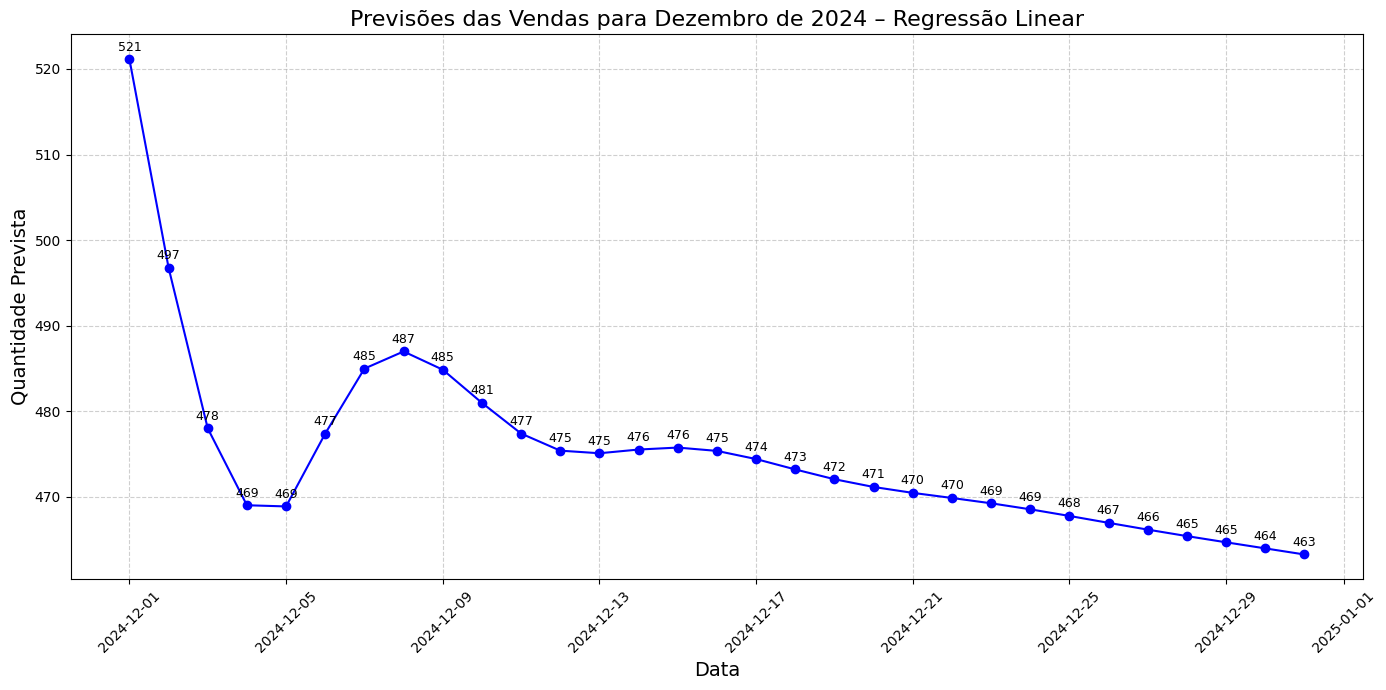

In [ ]:
# Código 6 – Gráfico das Previsões para Dezembro/2024 (Regressão Linear)

# Importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Upload do arquivo Excel com as previsões de dezembro geradas anteriormente
uploaded = files.upload()

# Carregar as previsões
df = pd.read_excel(list(uploaded.keys())[0])

# Garantir que a coluna "Data" esteja em formato datetime
df['Data'] = pd.to_datetime(df['Data'])
df.set_index('Data', inplace=True)

# Plotagem do gráfico
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Previsão Regressão Linear'], marker='o', linestyle='-', color='blue')

# Configuração do gráfico
plt.title('Previsões das Vendas para Dezembro de 2024 – Regressão Linear', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Quantidade Prevista', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

# Destacar valores no gráfico
for date, value in zip(df.index, df['Previsão Regressão Linear']):
    plt.text(date, value + 1, f'{value:.0f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()
